<a href="https://colab.research.google.com/github/tanveerntu/compressed-air/blob/main/PycaretModelAir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pycaret

     |████████████████████████████████| 256kB 3.4MB/s 
     |████████████████████████████████| 1.6MB 10.6MB/s 
     |████████████████████████████████| 1.8MB 23.9MB/s 
     |████████████████████████████████| 148.9MB 80kB/s 
     |████████████████████████████████| 13.9MB 37.4MB/s 
     |████████████████████████████████| 102kB 9.9MB/s 
     |████████████████████████████████| 6.8MB 31.6MB/s 
     |████████████████████████████████| 66.2MB 83kB/s 
     |████████████████████████████████| 276kB 42.1MB/s 
     |████████████████████████████████| 174kB 42.7MB/s 
     |████████████████████████████████| 266kB 50.9MB/s 
     |████████████████████████████████| 1.1MB 42.8MB/s 
     |████████████████████████████████| 153kB 48.9MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 6.0MB 42.7MB/s 
     |████████████████████████████████| 163kB 42.4MB/s 
     |████████████████████████████████| 327kB 47.2MB/s 
     |████████████████████████████████| 61kB 869kB/s

In [3]:
import pandas as pd

In [4]:
from google.colab import files
data = files.upload()

Saving ca_prediction_data.csv to ca_prediction_data.csv


In [5]:
df = pd.read_csv('ca_prediction_data.csv')

In [6]:
df.head()

,Weft Count Ne,Fabric Width,Loom RPM,Reed Count,Air Consumption LPS
0,10,63,450,16.00,14.3
1,10,63,450,28.75,14.1
2,10,63,450,53.50,13.8
3,10,63,550,16.00,15.0
4,10,63,550,28.75,14.8


In [16]:
df.dtypes

Weft Count Ne            int64
Fabric Width             int64
Loom RPM                 int64
Reed Count             float64
Air Consumption LPS    float64
dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder

In [29]:
#converting categorical data to numeric data.
df['Weft Count Ne'] = df['Weft Count Ne'].astype('float64') 
df['Fabric Width'] = df['Fabric Width'].astype('float64') 
df['Loom RPM'] = df['Loom RPM'].astype('float64') 


In [30]:
df.dtypes

Weft Count Ne          float64
Fabric Width           float64
Loom RPM               float64
Reed Count             float64
Air Consumption LPS    float64
dtype: object

In [31]:
from pycaret.regression import *

In [32]:
r1 = setup(df, target = 'Air Consumption LPS', session_id = 123,)

,Description,Value
0,session_id,123
1,Target,Air Consumption LPS
2,Original Data,"(108, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(75, 4)"


In [33]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2923,0.1795,0.3935,0.9940,0.0154,0.0125,0.040
xgboost,Extreme Gradient Boosting,0.3590,0.2859,0.4942,0.9907,0.0201,0.0157,0.242
et,Extra Trees Regressor,0.4133,0.3793,0.5680,0.9881,0.0229,0.0182,0.357
rf,Random Forest Regressor,0.3973,0.3838,0.5672,0.9875,0.0228,0.0176,0.409
dt,Decision Tree Regressor,0.5232,0.4909,0.6651,0.9837,0.0272,0.0234,0.014
lr,Linear Regression,0.6824,0.7905,0.8460,0.9746,0.0440,0.0351,0.300
ridge,Ridge Regression,0.6824,0.7905,0.8460,0.9746,0.0440,0.0351,0.012
lar,Least Angle Regression,0.6824,0.7905,0.8460,0.9746,0.0440,0.0351,0.013
br,Bayesian Ridge,0.6836,0.7902,0.8463,0.9746,0.0440,0.0351,0.013
en,Elastic Net,0.6875,0.7923,0.8466,0.9744,0.0432,0.0349,0.014


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
gbr_air = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3213,0.1474,0.3839,0.9959,0.0130,0.0118
1,0.3159,0.1430,0.3782,0.9955,0.0147,0.0134
2,0.3771,0.2269,0.4763,0.9939,0.0183,0.0163
3,0.1376,0.0326,0.1805,0.9993,0.0073,0.0059
4,0.2615,0.1109,0.3331,0.9959,0.0131,0.0110
5,0.2577,0.0958,0.3095,0.9981,0.0173,0.0142
6,0.3316,0.3648,0.6040,0.9899,0.0215,0.0142
7,0.5099,0.4748,0.6891,0.9769,0.0250,0.0192
8,0.2519,0.1702,0.4125,0.9952,0.0151,0.0107
9,0.1587,0.0282,0.1680,0.9990,0.0086,0.0084


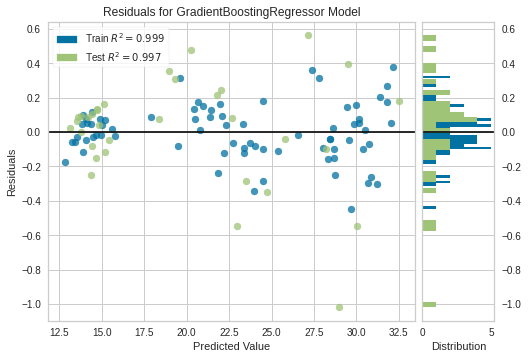

In [35]:
plot_model(gbr_air, plot = 'residuals')

In [36]:
# save transformation pipeline and model 
save_model(gbr_air, model_name = 'gbrm_air')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='Air Consumption LPS',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeri...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_

In [42]:
xgboost_air = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2699,0.0958,0.3095,0.9973,0.0116,0.0108
1,0.4032,0.3805,0.6169,0.9880,0.0225,0.0162
2,0.6047,0.6132,0.7831,0.9834,0.0326,0.0275
3,0.1498,0.0340,0.1843,0.9993,0.0094,0.0077
4,0.2745,0.1256,0.3544,0.9954,0.0143,0.0114
5,0.1752,0.0418,0.2045,0.9992,0.0119,0.0101
6,0.3253,0.3895,0.6241,0.9892,0.0218,0.0133
7,0.5408,0.4895,0.6996,0.9762,0.0274,0.0217
8,0.5349,0.4251,0.6520,0.9879,0.0234,0.0210
9,0.3112,0.2637,0.5135,0.9907,0.0266,0.0175


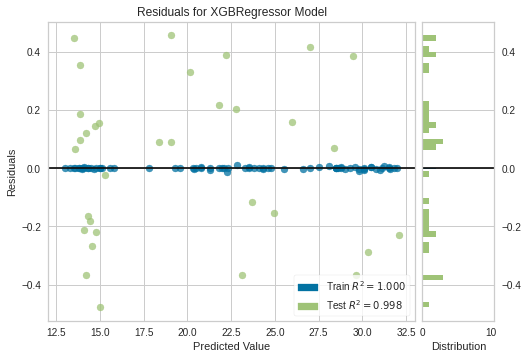

In [43]:
plot_model(xgboost_air, plot = 'residuals')

In [47]:
save_model(xgboost_air, model_name = 'xgboost_air')


Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='Air Consumption LPS',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeri...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_